In [1]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, RobustScaler

os.getcwd()
os.chdir('/Users/macbook/Downloads')

df = pd.read_csv('creditcard.csv')

Using TensorFlow backend.


### Data examinaiton and exploration 

In [2]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189661,128502.0,-1.143698,0.933782,1.420669,-1.351034,0.457504,0.437417,0.485494,-0.151146,1.990535,...,-0.252546,0.105219,-0.217476,0.332983,-0.467493,0.035820,-0.689017,-0.633665,4.32,0
97084,66066.0,1.102462,0.080346,0.365683,0.654227,-0.569071,-1.319481,0.376132,-0.302278,-0.130311,...,-0.434463,-1.486335,0.238385,0.676879,0.003452,-0.051684,-0.064815,0.033420,79.90,0
254954,156997.0,-0.583956,0.380821,1.821153,-1.236013,0.795275,0.082962,0.855512,-0.274273,0.379143,...,-0.152586,-0.087906,0.030473,0.731504,-0.375231,-0.849685,-0.292589,-0.307589,4.98,0
117121,74546.0,-2.600350,-2.266955,0.385756,-1.848367,-1.054576,-0.411064,0.265691,0.176493,-2.839399,...,0.008431,0.197411,-0.446373,0.309868,0.233251,-0.244209,0.200287,-0.438950,355.32,0
101734,67929.0,-1.067103,0.329641,-0.073866,-0.296561,2.997339,3.479318,0.071785,0.952093,-0.243807,...,-0.139058,-0.251589,0.031339,0.997499,0.495310,-0.356395,0.257817,0.178377,8.89,0


In [3]:
print(df.shape)
print(df.dtypes)

(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Find number of empty cells within the dataset

df.isnull().sum().max()

0

Not Frauds 99.827 %
Frauds 0.173 %


Text(0.5, 1.0, 'Class Distributions, (0: No Fraud || 1: Fraud)')

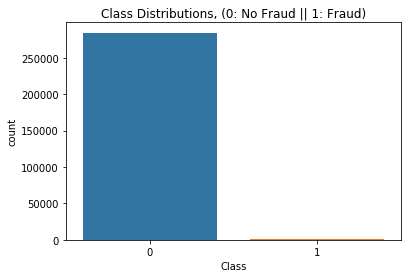

In [6]:
print('Not Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3),'%')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3),'%')

sns.countplot('Class', data=df)
plt.title('Class Distributions, (0: No Fraud || 1: Fraud)', fontsize=12)

- The dataset is greatly imbalanced. There are 99.8% genuine transactions vs. 0.17% fraudulent transactions

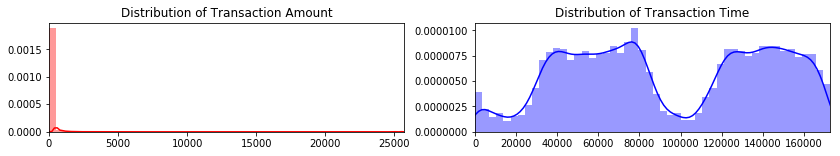

In [7]:
# Examine distribution of transaction amount and transaction time within the dataset  

fig, ax = plt.subplots(1, 2, figsize=(14,2))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

#### All features except 'Time' and 'Amount' are scaled as result of PCA, let's scale these two features as well

In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
201532,133922.0,2.001794,-0.910855,0.094888,-1.373833,-1.481643,-0.796891,-1.090661,-0.030821,2.584086,...,0.166236,0.110548,-0.317049,-0.184670,0.073698,-0.026610,12.99,0,-0.125900,0.578367
9127,12913.0,1.167407,0.634733,-0.212807,1.508873,0.138169,-1.186329,0.413506,-0.390601,1.087883,...,-0.138693,0.242341,0.693209,-0.401330,-0.017432,0.042637,47.30,0,0.353525,-0.843278
88937,62353.0,0.161882,-2.227123,-0.163270,-1.074220,-1.177193,0.276668,0.079725,0.143839,1.432104,...,-0.479153,-0.213420,0.157457,-0.010214,-0.047312,0.089394,523.44,0,7.006777,-0.262444
103913,68851.0,-4.006371,1.436094,-0.022974,0.085234,-0.118355,-0.452532,1.097590,-0.813020,1.259296,...,0.723931,0.068362,-0.801720,-0.240057,-2.445941,-0.064104,49.95,0,0.390554,-0.186104
61750,49971.0,1.234343,0.643828,-0.584712,0.819150,0.341238,-0.976921,0.366226,-0.207472,-0.245185,...,-0.059703,-0.024351,0.514467,0.396943,-0.010993,0.040522,0.76,0,-0.296793,-0.407911


### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#dropping the actual time and amount colummns since they are not scaled, keeping the scaled time and amount
df= df.drop(['Time','Amount'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels and see if both the train and test label distribution are 
# similarly distributed

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random under-sampling to deal with the imbalance issue

In [10]:
# count the number of fraudulent transcation
(df['Class'] != 0).sum()

492

In [11]:
# Under sample the amount of genuine transation to 492 entries to deal with the imbalance issue 
df = df.sample(frac=1, random_state=42)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
179668,-1.348538,-0.069269,-0.152705,-2.026318,0.056845,-0.766505,-0.005423,0.331529,-1.203795,-0.552739,...,0.546276,-0.043306,-0.484284,-0.191401,-0.352047,-0.231001,0.156154,0,0.542863,0.463997
44223,-19.139733,9.286847,-20.134992,7.818673,-15.652208,-1.668348,-21.340478,0.641900,-8.550110,-16.649628,...,0.520543,-0.760556,0.662767,-0.948454,0.121796,-3.381843,-1.256524,1,1.647453,-0.503307
123270,1.082566,1.094862,-1.367020,2.012554,0.708142,-0.807712,0.151952,0.158353,0.009872,-1.925278,...,-0.734344,-0.106725,-0.224999,0.569167,-0.335033,0.089140,0.112337,1,-0.293440,-0.091930
235634,-1.125092,3.682876,-6.556168,4.016731,-0.425571,-2.031210,-2.650137,1.131249,-2.946890,-4.816401,...,1.348156,-0.053686,0.284122,-1.174469,-0.087832,0.718790,0.676216,1,-0.296793,0.749351
281674,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,...,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,1,0.286872,1.006309


In [12]:
new_df.shape # new_df = the random undersample data with 492 fraudulent and 492 non-fraudulent 

(984, 31)

### Dimensionality Reduction and Clustering 

In [13]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.8 s
PCA took 0.034 s
Truncated SVD took 0.0043 s


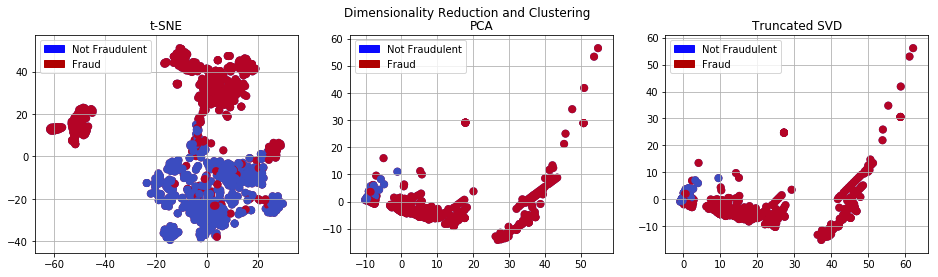

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
f.suptitle('Dimensionality Reduction and Clustering', fontsize=12)

blue = mpatches.Patch(color='#0A0AFF', label='Not Fraudulent')
red = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=12)

ax1.grid(True)

ax1.legend(handles=[blue, red])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=12)

ax2.grid(True)

ax2.legend(handles=[blue, red])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=12)

ax3.grid(True)

ax3.legend(handles=[blue, red])

plt.show()

### LogisticRegression, KNN, SVC, DecisionTree, and GaussianNB Classifier 

In [17]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "XG Boost Classifier": xgb.XGBClassifier(random_state=42,learning_rate=0.01)
}

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "training score =", round(training_score.mean(), 2) * 100, "%")

LogisticRegression training score = 95.0 %
KNeighborsClassifier training score = 93.0 %
SVC training score = 94.0 %
DecisionTreeClassifier training score = 89.0 %
GaussianNB training score = 93.0 %
RandomForestClassifier training score = 94.0 %
XGBClassifier training score = 94.0 %


### Grid Search CV to find the best parameters

In [393]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_